In [2]:
from matplotlib import pyplot as plt

from data_generator.main import get_real_data, generate_from_real_data
from data_generator.utils import plot_distribution_comparison
from methods.adf.main1 import adf_fairness_testing
from methods.utils import reformat_discrimination_results, convert_to_non_float_rows, compare_discriminatory_groups, \
    check_groups_in_synthetic_data, get_groups

In [3]:
data_obj, schema = get_real_data('bank', use_cache=False)
results_df_origin, metrics_origin = adf_fairness_testing(data_obj, max_global=5000, max_local=2000, max_iter=1000,
                                                         cluster_num=100, random_seed=42, max_runtime_seconds=400)

Fitting GaussianCopulaSynthesizer...


2025-03-02 18:45:29 - ADF - INFO - Dataset shape: (45211, 16)
2025-03-02 18:45:29 - ADF - INFO - Protected attributes: ['Attr2_T', 'Attr3_T']
2025-03-02 18:45:29 - ADF - INFO - Time limit: 400 seconds
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
2025-03-02 18:45:29 - sklearnex - INFO - sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
2025-03-02 18:45:29 - sklearnex - INFO - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
2025-03-02 18:45:29 - sklearnex - INFO - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
2025-03-02 18:45:29 - sklearnex - INFO - sklearn.utils

In [4]:
predefined_groups_origin, nb_elements = get_groups(results_df_origin, data_obj, schema)

Pre-computing attribute combinations...


Attribute combinations: 12it [00:00, 358.06it/s]


Processing valid cases...


Processing case pairs: 100%|██████████| 1384/1384 [00:01<00:00, 1132.59it/s]


In [11]:
data_obj_synth, schema = generate_from_real_data('bank', nb_groups=1, predefined_groups=predefined_groups_origin,
                                                 use_cache=False,
                                                 min_alea_uncertainty=0.0,
                                                 max_alea_uncertainty=0.0,
                                                 min_epis_uncertainty=0.0,
                                                 max_epis_uncertainty=0.0, )
#data_obj_synth.dataframe = data_obj_synth.dataframe.sample(data_obj.dataframe.shape[0], replace=True)

Fitting GaussianCopulaSynthesizer...
Training GaussianCopulaSynthesizer on bank dataset...


Sampling conditions: 100%|██████████| 960/960 [00:00<00:00, 7925.92it/s]

Sampling conditions:   0%|          | 0/110 [00:00<?, ?it/s]

Processing 25 predefined groups



Sampling conditions: 100%|██████████| 131/131 [00:00<00:00, 1151.56it/s]

Sampling conditions: 100%|██████████| 116/116 [00:00<00:00, 1037.73it/s]
Generating data: 2it [00:00,  3.29it/s]                       
Sampling conditions: 100%|██████████| 1212/1212 [00:00<00:00, 9907.36it/s] 

Sampling conditions: 100%|██████████| 1140/1140 [00:00<00:00, 7833.05it/s]
Generating data: 3it [00:01,  2.58it/s]
Sampling conditions: 100%|██████████| 1103/1103 [00:00<00:00, 9417.98it/s]

Sampling conditions: 100%|██████████| 800/800 [00:00<00:00, 6754.21it/s]
Generating data: 4it [00:01,  2.49it/s]
Sampling conditions: 100%|██████████| 936/936 [00:00<00:00, 7780.53it/s]

Sampling conditions: 100%|██████████| 147/147 [00:00<00:00, 1333.18it/s]
Generating data: 5it [00:01,  2.60it/s]
Sampling conditions: 100%|██████████| 1057/1057 [00:00<00:00, 7990.52it/s]

Sampling conditions: 100%|██████████| 451/451 [00:00<00:00, 3879.94it/s]
Generating data: 6it [00:02,  2.57it/s]
Sampling conditions: 100%|██████

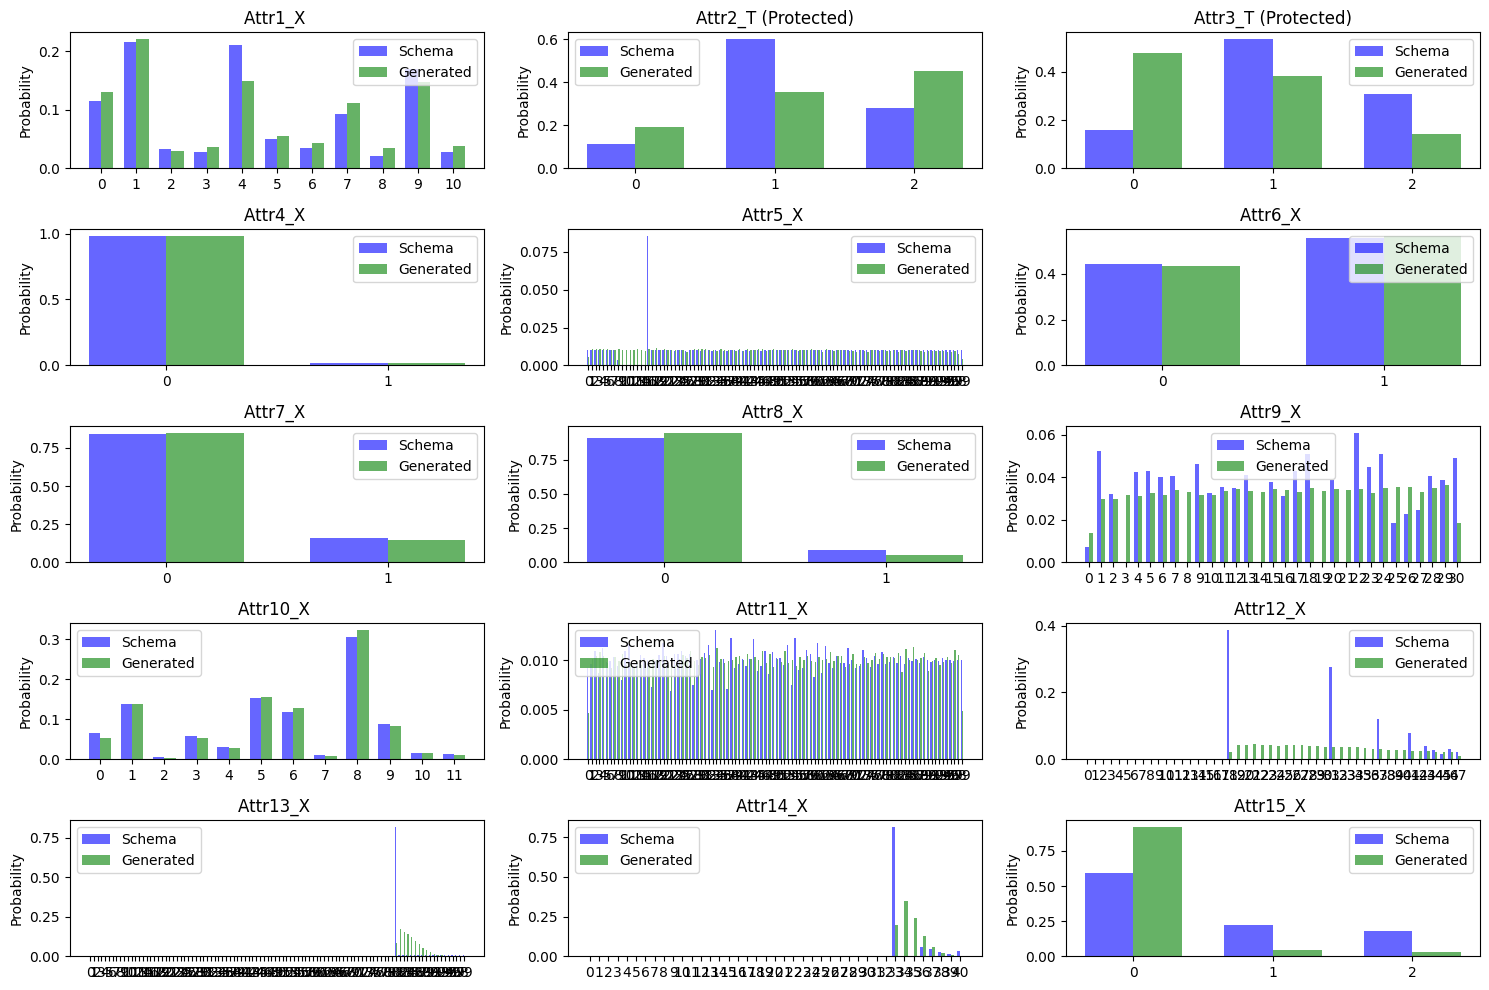

In [12]:
fig = plot_distribution_comparison(schema, data_obj_synth)
plt.show()

In [13]:
group_check_results = check_groups_in_synthetic_data(data_obj_synth, predefined_groups_origin)
print(f"Found {group_check_results['groups_found']} out of {group_check_results['total_groups']} groups")
print(f"Coverage: {group_check_results['coverage_percentage']:.2f}%")

Found 25 out of 25 groups
Coverage: 100.00%


In [14]:
results_df_synth, metrics_synth = adf_fairness_testing(data_obj_synth, max_global=10000, max_local=2000, max_iter=2000,
                                                       cluster_num=100, random_seed=42, max_runtime_seconds=600)

2025-03-02 19:51:18 - ADF - INFO - Dataset shape: (43342, 16)
2025-03-02 19:51:18 - ADF - INFO - Protected attributes: ['Attr2_T', 'Attr3_T']
2025-03-02 19:51:18 - ADF - INFO - Time limit: 600 seconds
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
2025-03-02 19:51:18 - sklearnex - INFO - sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
2025-03-02 19:51:18 - sklearnex - INFO - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
2025-03-02 19:51:18 - sklearnex - INFO - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
2025-03-02 19:51:18 - sklearnex - INFO - sklearn.utils

In [15]:
predefined_groups_synth, nb_elements_synth = get_groups(results_df_synth, data_obj, schema)

Pre-computing attribute combinations...


Attribute combinations: 9it [00:00, 318.21it/s]


Processing valid cases...


Processing case pairs: 100%|██████████| 7019/7019 [00:05<00:00, 1310.82it/s]


In [18]:
comparison_results = compare_discriminatory_groups(predefined_groups_origin, predefined_groups_synth)